In [130]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [131]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.drop(['phone_number','TaxCode','business_certificate','application_date',
                'owner_name','owner_address','owner_city','owner_state'],axis=1,inplace=True)
businesses.head()

# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,94114


In [4]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=['date'])
inspections['inspection_id']=inspections.index
inspections.head()

,business_id,Score,date,type,inspection_id
0,10,NaN,2014-08-07,Reinspection/Followup,0
1,10,94.0,2014-07-29,Routine - Unscheduled,1
2,10,NaN,2014-01-24,Reinspection/Followup,2
3,10,92.0,2014-01-14,Routine - Unscheduled,3
4,19,94.0,2014-11-10,Routine - Unscheduled,4


In [14]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=['date'])
violations['violation_id']=violations.index
violations.head()

,business_id,date,ViolationTypeID,risk_category,description,violation_id
0,10,2014-01-14,103154,Low Risk,Unclean or degraded floors walls or ceilings,0
1,10,2014-01-14,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...,1
2,10,2014-01-14,103145,Low Risk,Improper storage of equipment utensils or linens,2
3,10,2014-07-29,103129,Moderate Risk,Insufficient hot water or running water,3
4,10,2014-07-29,103144,Low Risk,Unapproved or unmaintained equipment or utensils,4


In [30]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

inspections_violations = pd.merge(inspections, violations, how='left', on=['business_id','date'], sort=True)
restaurant_scores = pd.merge(inspections_violations, businesses, how='left', on='business_id')
restaurant_scores.head()

,business_id,Score,date,type,inspection_id,ViolationTypeID,risk_category,description,violation_id,name,address,city,postal_code,latitude,longitude,owner_zip
0,10,92.0,2014-01-14,Routine - Unscheduled,3,103154.0,Low Risk,Unclean or degraded floors walls or ceilings,0.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104
1,10,92.0,2014-01-14,Routine - Unscheduled,3,103119.0,Moderate Risk,Inadequate and inaccessible handwashing facili...,1.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104
2,10,92.0,2014-01-14,Routine - Unscheduled,3,103145.0,Low Risk,Improper storage of equipment utensils or linens,2.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104
3,10,NaN,2014-01-24,Reinspection/Followup,2,NaN,NaN,NaN,NaN,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104
4,10,94.0,2014-07-29,Routine - Unscheduled,1,103129.0,Moderate Risk,Insufficient hot water or running water,3.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,94104


In [31]:
# 2 Which ten business have had the most inspections?
# rest_scores.isnull().sum()
restaurant_scores.groupby("name").inspection_id.nunique().nlargest(10)

name
Peet's Coffee & Tea           87
Starbucks Coffee              71
Whole Foods Market            54
STARBUCKS                     49
Specialty's Cafe & Bakery     48
STARBUCKS COFFEE              44
San Francisco Soup Company    44
KENTUCKY FRIED CHICKEN        32
Lee's Deli                    31
Subway Sandwiches             31
Name: inspection_id, dtype: int64

In [32]:
# 3 Group and count the inspections by type
restaurant_scores.groupby("type").inspection_id.nunique().sort_values(ascending=False)

type
Routine - Unscheduled                15481
Reinspection/Followup                 5386
New Ownership                         1877
Complaint                             1634
New Construction                      1613
Non-inspection site visit              840
Complaint Reinspection/Followup        163
Structural Inspection                  120
Foodborne Illness Investigation        100
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: inspection_id, dtype: int64

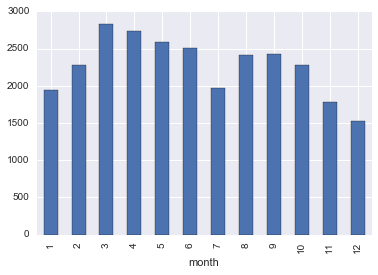

In [188]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
restaurant_scores['month'] = restaurant_scores['date'].dt.month
restaurant_scores.groupby('month').inspection_id.nunique().plot(kind='bar')

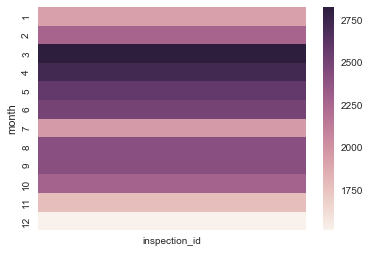

In [189]:
import seaborn as sns
data = pd.DataFrame(restaurant_scores.groupby('month').inspection_id.nunique())
heatmap = sns.heatmap(data)

In [35]:
# 5 Which zip code contains the most high risk violations?
restaurant_scores[restaurant_scores.risk_category == 'High Risk'].groupby('postal_code') \
    .violation_id.nunique().sort_values(ascending=False).head(1)

postal_code
94133    530
Name: violation_id, dtype: int64

In [46]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
restaurant_scores[restaurant_scores.type == 'New Ownership'].groupby('risk_category').violation_id.nunique()

risk_category
High Risk        145
Low Risk         546
Moderate Risk    419
Name: violation_id, dtype: int64

In [56]:
# 7 Examining the descriptions, what is the most common violation?
restaurant_scores.groupby('description').violation_id.nunique().sort_values(ascending=False).head(1)
# violations.description.value_counts().head(1)

description
Unclean or degraded floors walls or ceilings    3389
Name: violation_id, dtype: int64

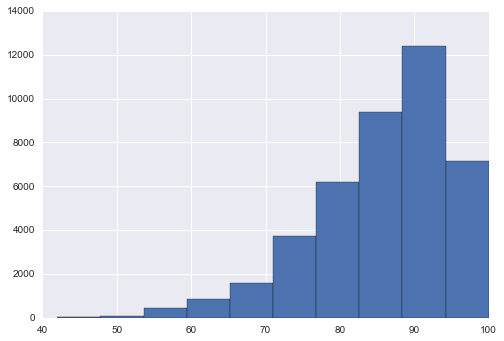

In [57]:
# 8 Create a hist of the scores with 10 bins
restaurant_scores.Score.hist(bins=10)

In [129]:
# 9 Can you predict risk category based on the other features in this dataset?

In [105]:
df = restaurant_scores.drop(['date','type','description','name','address','city', \
                             'owner_zip','latitude','longitude','inspection_id','violation_id'],axis=1)

In [106]:
df['risk_category'] = df.risk_category.map({'Low Risk':0, 'Moderate Risk':1, 'High Risk':2})

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57400 entries, 0 to 57399
Data columns (total 5 columns):
business_id        57400 non-null int64
Score              41801 non-null float64
ViolationTypeID    43914 non-null float64
risk_category      43902 non-null float64
postal_code        55837 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 2.6+ MB


In [113]:
df.isnull().sum()

business_id         0
Score               0
ViolationTypeID     0
risk_category       0
postal_code        15
dtype: int64

In [115]:
df = df.dropna(subset=[['risk_category','Score','ViolationTypeID','postal_code']])

In [111]:
df.postal_code = df.postal_code[df.postal_code != 'CA'].astype(int)

In [123]:
X = df.drop('risk_category', axis = 1)
y = df.risk_category
feature_cols = X.columns[:]

In [126]:
null_accuracy_rate = df['risk_category'].value_counts()[0] / float(df.shape[0])
null_accuracy_rate

0.52526352122773012

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

In [128]:
logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.52518390592278741

In [193]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

import requests
import json

restaurant_scores[restaurant_scores.risk_category == 'High Risk'].groupby(["business_id", 'risk_category']).size() \
  .sort_values(ascending=False)[:1]
latitude = restaurant_scores[restaurant_scores.business_id == 33446][:1].latitude.values[0]
longitude = restaurant_scores[restaurant_scores.business_id == 33446][:1].longitude.values[0]

access_token = "3798722982.726f657.bec6e4af3b1a421c8f13150eac2715f3"

locations_base = "https://api.instagram.com/v1/locations/"
location_search_url = "search?"
lat_p = "&lat=" + str(latitude)
long_p = "&lng=" + str(longitude)
access_p = "&access_token=" + access_token

response = requests.get(locations_base + location_search_url + lat_p + long_p + access_p)
json.loads(response.text)["data"]
location_ids = []
for location in json.loads(response.text)["data"]:
    location_ids.append(location["id"])

locations_recent_media = "/media/recent?access_token=" + access_token
resps = []
for id in location_ids:    
    response = requests.get(locations_base + str(id) + locations_recent_media + "&distance=5000")
    resps.append(response.text)
resps

[u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}',
 u'{"pagination": {}, "meta": {"code": 200}, "data": []}

In [ ]:
############################
### A Little More Morbid ###
############################

In [26]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [69]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race', 'Unnamed: 0':'killing_id'}, inplace=True)

In [70]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

killing_id       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [72]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings['streetaddress'].fillna('Unknown', inplace=True)
killings.isnull().sum()

killing_id       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [47]:
# 4. How many killings were there so far in 2015?
killings.year.value_counts()

2015    467
Name: year, dtype: int64

In [48]:
# 5. Of all killings, how many were male and how many female?
killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [49]:
# 6. How many killings were of unarmed people?
killings.armed[killings.armed == 'No'].value_counts()

No    102
Name: armed, dtype: int64

In [74]:
# 7. What percentage of all killings were unarmed?
killings.armed[killings.armed == 'No'].value_counts() / len(killings)

No    0.218415
Name: armed, dtype: float64

In [51]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [58]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

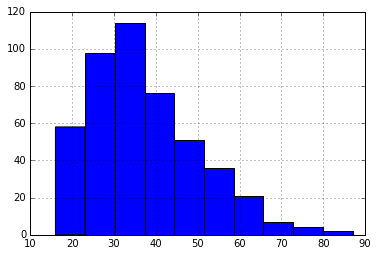

In [53]:
# 10. Display a histogram of ages of all killings
killings.age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b8b1090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11be21cd0>]], dtype=object)

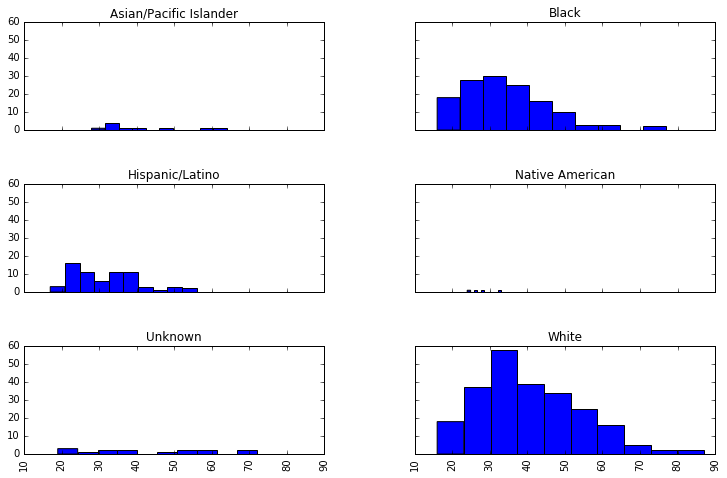

In [63]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race, figsize = (12,8), sharex = True, sharey = True)

In [64]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

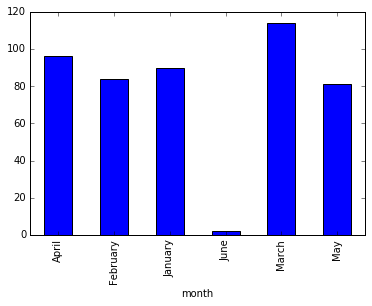

In [71]:
# 13. Show a bar chart with counts of deaths every month
killings.groupby('month').killing_id.count().plot(kind='bar')

In [ ]:
###################
### Less Morbid ###
###################

In [132]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [133]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop(['Employed_full_time_year_round', 'Major_code'], axis = 1, inplace=True)

In [134]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [135]:
# 3. What are the top 10 highest paying majors?
majors[['Major','Median']].sort_values(by='Median', ascending=False).head(10)

,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


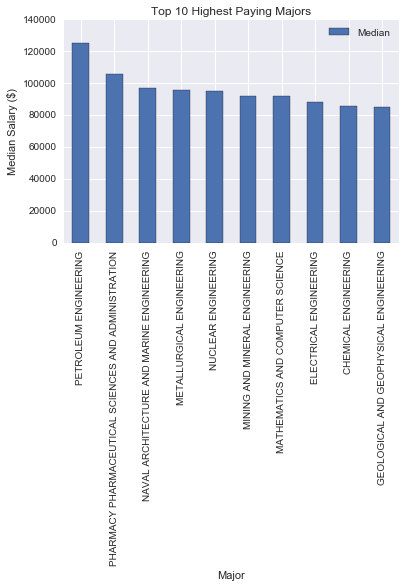

In [136]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
top10 = majors[['Major','Median']].sort_values(by='Median', ascending=False).head(10)
top10.plot(kind='bar', x='Major')
plt.title('Top 10 Highest Paying Majors')
plt.ylabel('Median Salary ($)')
plt.xlabel('Major')

In [137]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').Median.mean().sort_values(ascending=False)

Major_category
Engineering                            77758.620690
Computers & Mathematics                66272.727273
Physical Sciences                      62400.000000
Business                               60615.384615
Health                                 56458.333333
Agriculture & Natural Resources        55000.000000
Social Science                         53222.222222
Law & Public Policy                    52800.000000
Industrial Arts & Consumer Services    52642.857143
Biology & Life Science                 50821.428571
Communications & Journalism            49500.000000
Humanities & Liberal Arts              46080.000000
Psychology & Social Work               44555.555556
Education                              43831.250000
Arts                                   43525.000000
Interdisciplinary                      43000.000000
Name: Median, dtype: float64

In [138]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.mean().sort_values(ascending=False).head()

Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

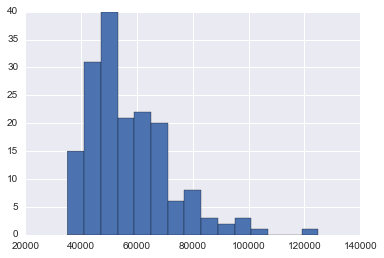

In [139]:
# 7. Plot a histogram of the distribution of median salaries
majors['Median'].hist(bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d55db90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d7a4f10>]], dtype=object)

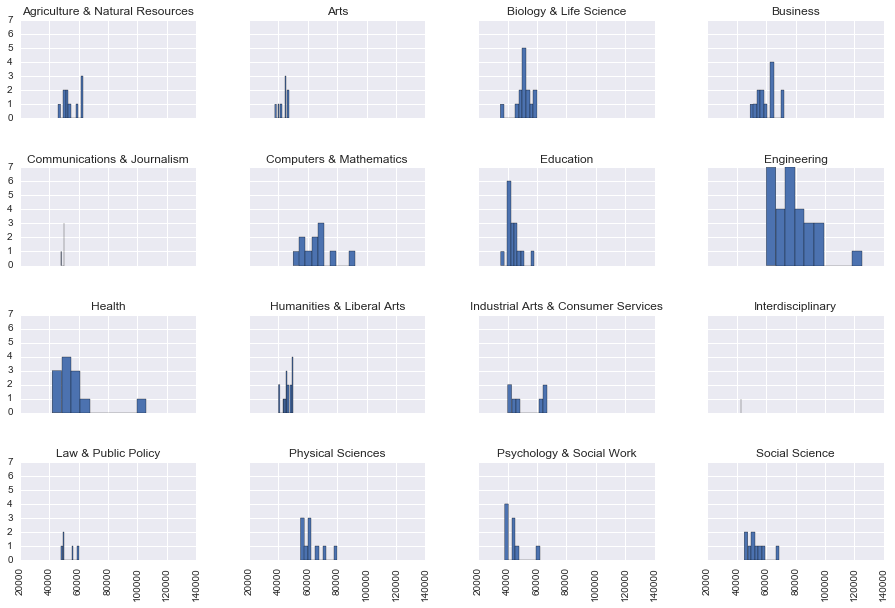

In [140]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors['Median'].hist(by=majors['Major_category'], sharex = True, sharey = True, figsize=(15,10))

In [154]:
# 9. What are the top 10 most UNemployed majors?
majors[['Major','Unemployment_rate']].sort_values(by='Unemployment_rate', ascending=False).Major.head(10)

146                     MISCELLANEOUS FINE ARTS
116                         CLINICAL PSYCHOLOGY
93                        MILITARY TECHNOLOGIES
27                    SCHOOL STUDENT COUNSELING
77                              LIBRARY SCIENCE
141                  VISUAL AND PERFORMING ARTS
19     COMPUTER PROGRAMMING AND DATA PROCESSING
119                           SOCIAL PSYCHOLOGY
104                  ASTRONOMY AND ASTROPHYSICS
11                                 ARCHITECTURE
Name: Major, dtype: object

In [150]:
# What are the unemployment rates?
majors[['Major','Unemployment_rate']].sort_values(by='Unemployment_rate', ascending=False).head(10)

,Major,Unemployment_rate
146,MISCELLANEOUS FINE ARTS,0.156147
116,CLINICAL PSYCHOLOGY,0.102712
93,MILITARY TECHNOLOGIES,0.101796
27,SCHOOL STUDENT COUNSELING,0.101746
77,LIBRARY SCIENCE,0.094843
141,VISUAL AND PERFORMING ARTS,0.094658
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
119,SOCIAL PSYCHOLOGY,0.087336
104,ASTRONOMY AND ASTROPHYSICS,0.086022
11,ARCHITECTURE,0.085991


In [161]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby('Major_category').Unemployment_rate.mean().sort_values(ascending=False).head(10)

Major_category
Arts                                   0.087601
Psychology & Social Work               0.077867
Interdisciplinary                      0.077269
Humanities & Liberal Arts              0.069429
Communications & Journalism            0.069125
Law & Public Policy                    0.067854
Social Science                         0.065686
Computers & Mathematics                0.059437
Industrial Arts & Consumer Services    0.058546
Physical Sciences                      0.054541
Name: Unemployment_rate, dtype: float64

In [167]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate'] = majors['Employed'] / majors['Total']

In [168]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate'] = 1 - majors['sample_employment_rate']

In [169]:
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
